t(9.42477796076938+-dt)=[9.42399896 9.42499896]
x(9.42477796076938+-dt)=[-1.00472281 -1.00472359]
v(9.42477796076938+-dt)=[-0.00078479  0.00021993]


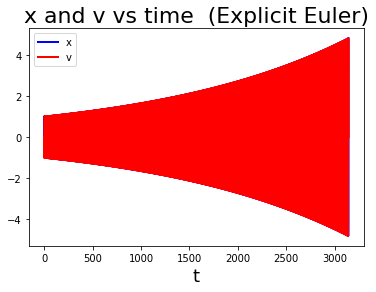

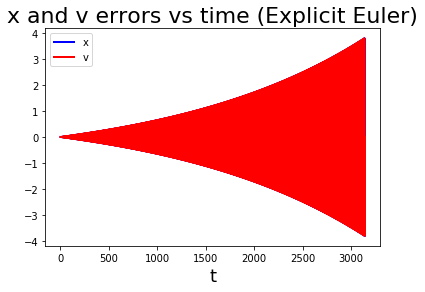

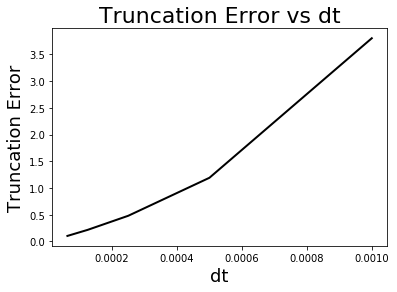

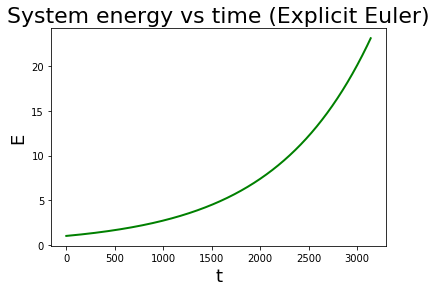

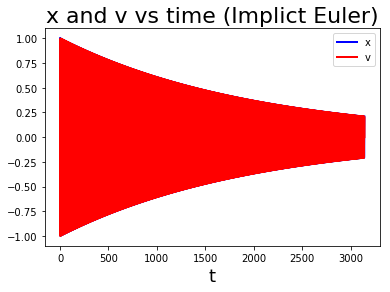

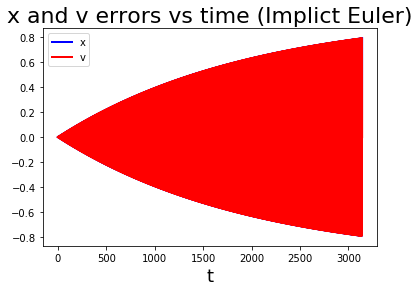

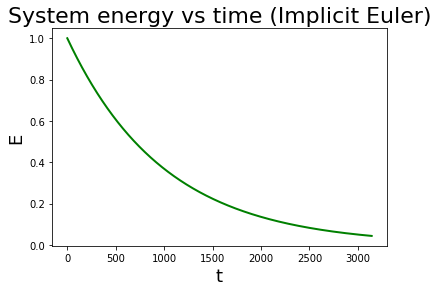

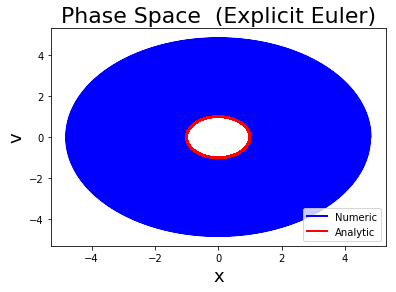

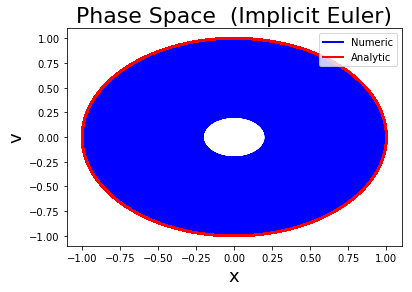

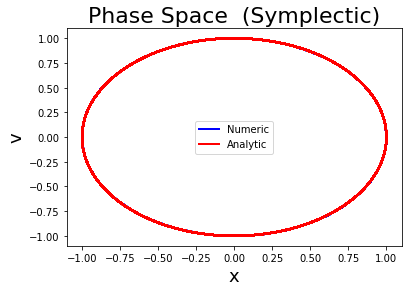

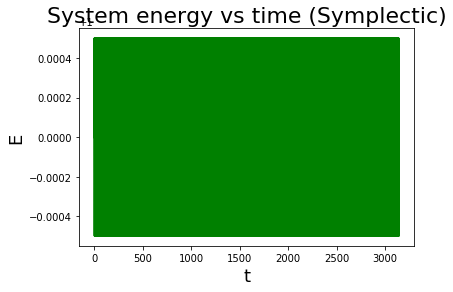

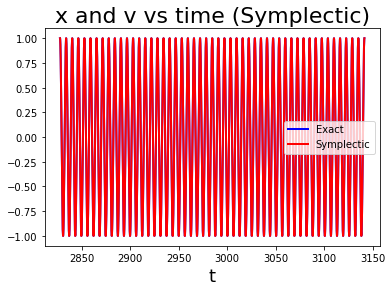

In [23]:
import math
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import mpmath

def Explicit_Euler(Xi,Vi,t0,tf,dt):
    N = int(round((tf-t0)/dt))
    t = np.linspace(t0,tf,N+1)
    x = np.zeros(len(t))
    v = np.zeros(len(t))
    v[0] = Vi
    x[0] = Xi

    for k in range(0,N):
        x[k+1] = x[k] + dt*v[k]
        v[k+1] = v[k] - dt*x[k]
    # Also Defines analytic functions given initial conditions
    xa = Xi*np.cos(t)+Vi*np.sin(t)
    va = Vi*np.cos(t)-Xi*np.sin(t)
    return Xi,Vi,x,v,t,dt,xa,va

# This function evaluates t,x,and v in a dt range around the set value
def Evaluate(value):
    index = np.where(np.logical_and(t>=value-dt, t<=value+dt))
    print("t("+repr(value)+"+-dt)=%s" % t[index])
    print("x("+repr(value)+"+-dt)=%s" % x[index])
    print("v("+repr(value)+"+-dt)=%s" % v[index])
    return t[index],x[index],v[index]

def Implicit_Euler(Xi,Vi,t0,tf,dt):
    N = int(round((tf-t0)/dt))
    t = np.linspace(t0,tf,N+1)
    x = np.zeros(len(t))
    v = np.zeros(len(t))
    v[0] = Vi
    x[0] = Xi
    
    # This uses numpy's linear algebra solver to solve equation (9) 
    for i in range(0,N):
        a = np.array([[1,-dt],[dt,1]])
        b = np.array([x[i],v[i]])
        [x[i+1],v[i+1]] = np.linalg.solve(a,b)
    
    # Also Defines analytic functions given initial conditions
    xa = Xi*np.cos(t)+Vi*np.sin(t)
    va = Vi*np.cos(t)-Xi*np.sin(t)
    return Xi,Vi,x,v,t,dt,xa,va

def Symplectic (Xi,Vi,t0,tf,dt):
    N = int(round((tf-t0)/dt))
    t = np.linspace(t0,tf,N+1)
    x = np.zeros(len(t))
    v = np.zeros(len(t))
    v[0] = Vi
    x[0] = Xi
    
    for i in range(0,N):
        x[i+1] = x[i]+dt*v[i]
        v[i+1] = v[i]-dt*x[i+1]
        
    # Also Defines analytic functions given initial conditions
    xa = Xi*np.cos(t)+Vi*np.sin(t)
    va = Vi*np.cos(t)-Xi*np.sin(t)
    return Xi,Vi,x,v,t,dt,xa,va

# Initialize Variables
Xi = 1
Vi = 0
ti = 0
tf = 1000*np.pi
dt = 0.001
Xi,Vi,x,v,t,dt,xa,va = Explicit_Euler(Xi,Vi,ti,tf,dt)
te,xe,ve = Evaluate(3*np.pi)

# Question 1
plt.figure()
plt.plot(t, x, linewidth=2.0, color='blue', label='x')
plt.plot(t, v, linewidth=2.0, color='red', label='v')
plt.xlabel('t', fontsize=18)
plt.ylabel('', fontsize=18)
plt.title('x and v vs time  (Explicit Euler)', fontsize=22)
plt.legend(['x','v'], loc='best')
plt.savefig('Explicit_X0_'+repr(Xi)+'_V0_'+repr(Vi)+'.png',bbox_inches='tight')
plt.show()

# Question 2
plt.figure()
plt.plot(t, (xa-x), linewidth=2.0, color='blue', label='x')
plt.plot(t, (va-v), linewidth=2.0, color='red', label='v')
plt.xlabel('t', fontsize=18)
plt.ylabel('', fontsize=18)
plt.title('x and v errors vs time (Explicit Euler)', fontsize=22)
plt.legend(['x','v'], loc='best')
plt.savefig('Explicit_Errors_X0_'+repr(Xi)+'_V0_'+repr(Vi)+'.png',bbox_inches='tight')
plt.show()

# Question 3
n = 4
h = dt*np.power(1/2,range(0,n+1))
trunc = np.zeros(len(h))

for i in range(len(h)):
    _,_,x1,_,_,_,xa1,_ = Explicit_Euler(Xi,Vi,ti,tf,h[i])
    trunc[i] = np.amax(xa1-x1)
        
plt.figure()
plt.plot(h, trunc, linewidth=2.0, color='black', label='trunc')
plt.xlabel('dt', fontsize=18)
plt.ylabel('Truncation Error', fontsize=18)
plt.title('Truncation Error vs dt', fontsize=22)
plt.savefig('Truncation_X0_'+repr(Xi)+'_V0_'+repr(Vi)+'.png',bbox_inches='tight')
plt.show()

# Question 4
E = x**(2)+v**(2)
plt.figure()
plt.plot(t, E, linewidth=2.0, color='green', label='E')
plt.xlabel('t', fontsize=18)
plt.ylabel('E', fontsize=18)
plt.title('System energy vs time (Explicit Euler)', fontsize=22)
plt.savefig('Explicit_Energy_X0_'+repr(Xi)+'_V0_'+repr(Vi)+'.png',bbox_inches='tight')
plt.show()

# Question 5
_,_,xI,vI,tI,_,xaI,vaI = Implicit_Euler(Xi,Vi,ti,tf,dt)

plt.figure()
plt.plot(t, xI, linewidth=2.0, color='blue', label='x')
plt.plot(t, vI, linewidth=2.0, color='red', label='v')
plt.xlabel('t', fontsize=18)
plt.ylabel('', fontsize=18)
plt.title('x and v vs time (Implict Euler)', fontsize=22)
plt.legend(['x','v'], loc='best')
plt.savefig('Implicit_X0_'+repr(Xi)+'_V0_'+repr(Vi)+'.png',bbox_inches='tight')
plt.show()

plt.figure()
plt.plot(t, (xaI-xI), linewidth=2.0, color='blue', label='x')
plt.plot(t, (vaI-vI), linewidth=2.0, color='red', label='v')
plt.xlabel('t', fontsize=18)
plt.ylabel('', fontsize=18)
plt.title('x and v errors vs time (Implict Euler)', fontsize=22)
plt.legend(['x','v'], loc='best')
plt.savefig('Implicit_Errors_X0_'+repr(Xi)+'_V0_'+repr(Vi)+'.png',bbox_inches='tight')
plt.show()

EI = xI**(2)+vI**(2)
plt.figure()
plt.plot(t, EI, linewidth=2.0, color='green', label='E')
plt.xlabel('t', fontsize=18)
plt.ylabel('E', fontsize=18)
plt.title('System energy vs time (Implicit Euler)', fontsize=22)
plt.savefig('Implicit_Energy_X0_'+repr(Xi)+'_V0_'+repr(Vi)+'.png',bbox_inches='tight')
plt.show()

# Part 2
######################
plt.figure()
plt.plot(x, v, linewidth=2.0, color='blue', label='numeric')
plt.plot(xa, va, linewidth=2.0, color='red', label='analytic')
plt.xlabel('x', fontsize=18)
plt.ylabel('v', fontsize=18)
plt.title('Phase Space  (Explicit Euler)', fontsize=22)
plt.legend(['Numeric','Analytic'], loc='best')
plt.savefig('Explicit_Phase_X0_'+repr(Xi)+'_V0_'+repr(Vi)+'.png',bbox_inches='tight')
plt.show()

plt.figure()
plt.plot(xI, vI, linewidth=2.0, color='blue', label='numeric')
plt.plot(xaI, vaI, linewidth=2.0, color='red', label='analytic')
plt.xlabel('x', fontsize=18)
plt.ylabel('v', fontsize=18)
plt.title('Phase Space  (Implicit Euler)', fontsize=22)
plt.legend(['Numeric','Analytic'], loc='best')
plt.savefig('Implicit_Phase_X0_'+repr(Xi)+'_V0_'+repr(Vi)+'.png',bbox_inches='tight')
plt.show()

# b
_,_,xs,vs,ts,_,xas,vas = Symplectic(Xi,Vi,ti,tf,dt)

plt.figure()
plt.plot(xs, vs, linewidth=2.0, color='blue', label='numeric')
plt.plot(xa, va, linewidth=2.0, color='red', label='analytic')
plt.xlabel('x', fontsize=18)
plt.ylabel('v', fontsize=18)
plt.title('Phase Space  (Symplectic)', fontsize=22)
plt.legend(['Numeric','Analytic'], loc='best')
plt.savefig('Symplectic_Phase_X0_'+repr(Xi)+'_V0_'+repr(Vi)+'.png',bbox_inches='tight')
plt.show()

Es = xs**(2)+vs**(2)
plt.figure()
plt.plot(ts, Es, linewidth=2.0, color='green', label='E')
plt.xlabel('t', fontsize=18)
plt.ylabel('E', fontsize=18)
plt.title('System energy vs time (Symplectic)', fontsize=22)
plt.savefig('Symplectic_Energy_X0_'+repr(Xi)+'_V0_'+repr(Vi)+'.png',bbox_inches='tight')
plt.show()

k = 10
me = round(-len(t)/k)
plt.figure()
plt.plot(ts[me:], (xas)[me:], linewidth=2.0, color='blue', label='x')
plt.plot(ts[me:], (xs)[me:], linewidth=2.0, color='red', label='v')
plt.xlabel('t', fontsize=18)
plt.ylabel('', fontsize=18)
plt.title('x and v vs time (Symplectic)', fontsize=22)
plt.legend(['Exact','Symplectic'], loc='best')
plt.savefig('Symplectic_X0_'+repr(Xi)+'_V0_'+repr(Vi)+'.png',bbox_inches='tight')
plt.show()